In [2]:
import csv
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [4]:
#Load in the CSV Bike Station Location Data
df = pd.read_csv('../Data/HRSQ12020.csv')
df

Station #                               Station Name  NumRacks   Latitude  \
0        1000                   Liberty Ave & Stanwix St        16  40.441326   
1        1001                 Forbes Ave & Market Square        19  40.440877   
2        1002                        Third Ave & Wood St        15  40.439030   
3        1003  First Ave & Smithfield St (Art Institute)        15  40.437200   
4        1004               First Ave & B St (T Station)        15  40.435887   
..        ...                                        ...       ...        ...   
95      49781                   Fifth Ave & Miltenberger         6  40.438296   
96      49801                                  Microsoft         6  40.453797   
97      49881                     Arch St & Jacksonia St         5  40.457773   
98      49921     W General Robinson St & Chuck Noll Way         5  40.447412   
99      49951                        Butler St & 36th St         6  40.465299   

    Longitude  
0  -80.004679  
1  -80.003080  
2  -80.001860  
3  -80.000375  
4  -79.997102  
..        ...  
95 -79.981177  
96 -79.990940  
97 -80.009458  
98 -80.012065  
99 -79.965277  

[100 rows x 5 columns]

In [5]:
#fixing wrong negative value for Latitude
df.loc[df["Latitude"] == df["Latitude"].min()]
df.at[80, 'Latitude'] = 40.467715

geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
crs = {'init' :'epsg:4326'}
geobikes = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geobikes.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Station #                               Station Name  NumRacks   Latitude  \
0       1000                   Liberty Ave & Stanwix St        16  40.441326   
1       1001                 Forbes Ave & Market Square        19  40.440877   
2       1002                        Third Ave & Wood St        15  40.439030   
3       1003  First Ave & Smithfield St (Art Institute)        15  40.437200   
4       1004               First Ave & B St (T Station)        15  40.435887   

   Longitude                    geometry  
0 -80.004679  POINT (-80.00468 40.44133)  
1 -80.003080  POINT (-80.00308 40.44088)  
2 -80.001860  POINT (-80.00186 40.43903)  
3 -80.000375  POINT (-80.00038 40.43720)  
4 -79.997102  POINT (-79.99710 40.43589)

In [7]:
#Load in the CSV median income by household data
housingdf = pd.read_csv('../Data/IncomeCensusData.csv', thousands=",")

#get only the neighborhood IDs that match to the Pittsburgh Neighborhood Map
housingdf = housingdf[housingdf.CensusTract != 0]

#change the neighborhood ids to be strings and have a 0 in front to match the other df output
housingdf['tractce10'] = str('')

for index, row in housingdf.iterrows():
    strVal = str(row['CensusTract'])
    strVals = strVal.split(".")
    if len(strVals[0]) < 6:
        strVals[0] = "0" + strVals[0]
    housingdf.at[index, 'tractce10'] = strVals[0]

count = 0
for index, row in housingdf.iterrows():
    count += 1
    print(str(row["tractce10"]))
    
print(count)

980000
980100
980300
980400
980500
980600
980700
980800
980900
981000
981100
981200
982200
051100
260900
050900
130300
051000
562300
120400
562000
130100
040500
050100
030500
130600
040200
981800
120700
111400
040600
250900
261400
261500
250700
561900
130400
111500
120300
120800
040400
050600
262000
101600
040900
130200
300100
481000
562600
180300
562400
563200
241200
101700
270300
080400
111300
090300
070900
562700
290100
191500
561600
562500
562900
281400
080700
290200
060500
060300
271500
180700
191900
220600
080200
210700
561700
240600
270400
562800
260200
100500
010300
101100
192000
191400
202200
160800
281500
170600
170200
250300
191600
290400
101400
070600
310200
141300
110200
320400
320700
191700
080900
260700
090100
070500
140500
080600
070800
563100
320600
160900
090200
270100
070300
191800
151700
101800
202300
151600
261200
563000
141400
191100
140600
190300
270800
110600
020100
140800
310300
141100
140200
141000
020300
140300
140100
140400
138


In [9]:
#get the 2010 census tract neighborhoods in Pittsburgh
cenTract = gpd.read_file('../Data/2010_Census_Tracts/a36fc9b1-4e53-4fd1-80fb-db1554e213422020328-1-nbfxcj.l6b8.shp')

count = 0
for index, row in cenTract.iterrows():
    count+=1
    print(str(row["tractce10"]))
    
print(count)

040500
040400
040200
030500
980000
020300
020100
262000
261500
261400
261200
260900
260700
563100
562400
981000
170200
180300
170600
010300
260200
180700
250900
562900
561900
130600
040900
562300
151700
151600
141400
141300
250300
241200
562000
080900
240600
220600
981800
080200
160800
101800
060300
080700
290400
981100
190300
101600
191100
191400
110600
141100
110200
101700
210700
980100
101100
140600
120400
191600
191700
101400
100500
090100
090200
090300
982200
191800
202300
563000
561600
561700
202200
980700
562700
562600
191900
080600
080400
070900
070800
300100
270800
981200
281400
281500
140500
290200
070600
070500
070300
060500
980600
140100
290100
051100
051000
050900
141000
140800
140400
191500
562500
310200
320400
140300
140200
271500
563200
192000
320600
320700
130400
130300
130200
270300
980400
481000
130100
120800
120700
980300
562800
120300
111500
310300
111400
111300
050600
980500
160900
050100
040600
270100
980900
250700
270400
980800
138


<ipython-input-9-00acb40b0c06>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cenTract["center"] = cenTract["geometry"].centroid


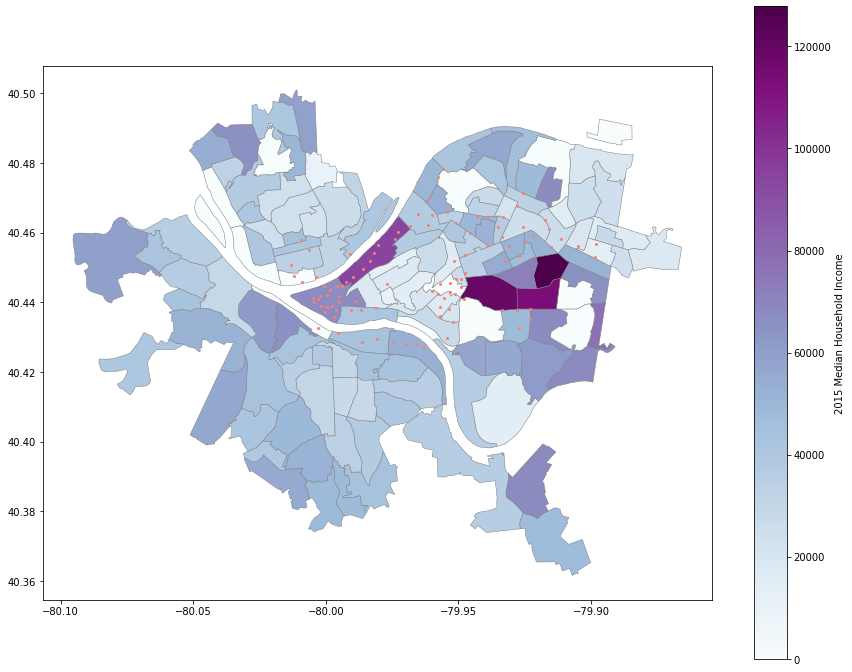

In [9]:

#find the centroids of each neighborhood for labeling
cenTract["center"] = cenTract["geometry"].centroid
map_points = cenTract.copy()
map_points.set_geometry("center", inplace = True)

#prep two merge the geodataframe and the dataframe together
pdf = cenTract.merge(housingdf, on='tractce10')

#plot the neighborhood ids on the map
ax = pdf.plot(column="2015TractMedianHouseHoldIncome", cmap='BuPu', figsize = (15, 12), edgecolor = "grey", 
              linewidth = 0.5, legend = True, legend_kwds={'label': "2015 Median Household Income",'orientation': "vertical"})
texts = []

    
#now adding the bike station location data on top of this map. 
#result = plt.scatter(df['Longitude'], df['Latitude'], 15, marker='o', color='Purple')
result = geobikes.plot(ax=ax, color="salmon", markersize=4);

#save figure and label it
resultFig = result.get_figure()
resultFig.savefig("result1.png")